In [1]:
import networkx as nx
import scipy as sc
import matplotlib.pyplot as plt
from itertools import combinations
import operator
from gurobipy import *
import random as rd

In [2]:
commodities = ['first']

In [3]:
G = nx.barabasi_albert_graph(1000,2)
pos=nx.spring_layout(G)
for (i,j,d) in G.edges(data=True):
    d['weight']=rd.randint(800,2000)
pos=nx.spring_layout(G)
# G=nx.Graph()
# filename="./roadNet-TX.txt"
# f=open(filename)
# for row in f:
#     myrow=row.split()
#     G.add_edge(myrow[0], myrow[1],weight=float(myrow[2])


In [4]:
for (i,j,d) in G.edges(data=True):
     d['weight']=rd.randint(2000,5200)

In [6]:
for k in commodities:
    for (i,d) in G.nodes(data=True):
        d[k]=0


In [8]:
for (i,j,d) in G.edges(data=True):
    d['capacity']=1

In [10]:
supplier=rd.sample(G.nodes(),1)
terminals=rd.sample(G.nodes(),1)


/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_63053/3856733034.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  supplier=rd.sample(G.nodes(),1)
/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_63053/3856733034.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  terminals=rd.sample(G.nodes(),1)


In [11]:
for i,d in G.nodes(data=True):
    if i==terminals[0]:
        d['first']=1
        print(i,d['first'])
#     if i==terminals[1]:
#         d['second']=2
#         print(i,d['second'])    

744 1


In [12]:
for i,d in G.nodes(data=True):
    if i==supplier[0]:
        d['first']=-1
        print(i,d['first'])
#     if i==supplier[1]:
#         d['second']=-2
#         print(i,d['second'])

446 -1


In [13]:
from gurobipy import *
m=Model('commodityflow')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-20


In [16]:
x = {}
for k in commodities:
    for i,d in G.nodes(data=True):
        for j in G.nodes():
            if (i,j) in G.edges():
                x[(k,i,j)] = m.addVar(lb=0,ub=1,vtype=GRB.BINARY,name='x.{0}.{1}.{2}'.format(k, i, j))

In [17]:
for (i,j,d) in G.edges(data=True):
    sum9=0
    for k in commodities:
        sum9+=x[(k,i,j)]
    m.addConstr(sum9<=d['capacity'])

In [18]:
for k in commodities:
    for i,d in G.nodes(data=True):
        sum1=0
        sum2=0
        for j in G.nodes():
            if i!=j:
                if (i,j) in G.edges():
                    sum1+=x[(k,i,j)]
                if (j,i) in G.edges():
                    sum2+=x[(k,j,i)]
        m.addConstr((sum2-sum1)==d[k])

In [19]:
obj=0
for k in commodities:
    for i,j,d in G.edges(data=True):
        obj+=x[(k,i,j)]*d['weight']

In [20]:
m.update()
m.setObjective(obj,GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3996 rows, 15968 columns and 19960 nonzeros
Model fingerprint: 0x82905639
Variable types: 0 continuous, 15968 integer (15968 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 23886.000000
Presolve removed 3 rows and 7987 columns
Presolve time: 0.04s
Presolved: 3993 rows, 7981 columns, 19950 nonzeros
Variable types: 0 continuous, 7981 integer (7981 binary)

Root relaxation: objective 5.686000e+03, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    5686.0000000 5686.00000  0.00%     -    0s

Explored 

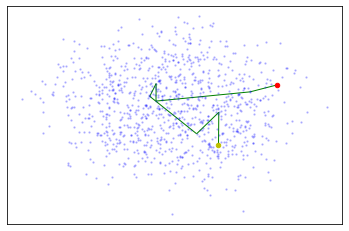

In [22]:
route1=[(i,j) for (i,j) in G.edges() if x[('first',i,j)].X>0 or x[('first',j,i)].X>0 ]
#route2=[(i,j) for (i,j) in G.edges() if x[('second',i,j)].X>0 or x[('second',j,i)].X>0]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='b', node_size=2,alpha=0.2)
nx.draw_networkx_nodes(G,pos,nodelist=supplier,node_color='y', node_size=20)
nx.draw_networkx_nodes(G,pos,nodelist=terminals,node_color='r', node_size=20)
nx.draw_networkx_edges(G,pos,edgelist=route1,edge_color='g', width=1)
nx.draw_networkx_edges(G,pos,edgelist=route2,edge_color='black',width=1)
plt.savefig("k=1.png", dpi=1000)
